In [1]:
!cd .. && mkdir build
!cd ../build/ && rm -rf *
!cd ../build && cmake \
  -DPYTHON_EXECUTABLE="$(which python)" \
  -DCMAKE_BUILD_TYPE=Release ..
!cd ../build && make install

mkdir: cannot create directory ‘build’: File exists
-- The C compiler identification is GNU 9.3.0
-- The CXX compiler identification is GNU 9.3.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
Release mode
-- Found PythonInterp: /home/migue/.virtualenvs/metnum-tp3/bin/python (found version "3.8.5") 
-- Found PythonLibs: /usr/lib/x86_64-linux-gnu/libpython3.8.so
-- pybind11 v2.2.4
-- Performing Test HAS_FLTO
-- Performing Test HAS_FLTO - Success
-- LTO enabled
CMAKE_INSTALL_PREFIX=/home/migue/Desktop/metnum-tp3
-- Configuring done
-- Generati

In [164]:
!pwd
!python --version

from commons import linear_regression
import metnum

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/home/migue/Desktop/metnum-tp3/notebooks
Python 3.8.5


In [165]:
df = pd.read_csv('../data/train.csv')

In [166]:
df.info()
df.ciudad.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          240000 non-null  int64  
 1   titulo                      234613 non-null  object 
 2   descripcion                 238381 non-null  object 
 3   tipodepropiedad             239954 non-null  object 
 4   direccion                   186928 non-null  object 
 5   ciudad                      239628 non-null  object 
 6   provincia                   239845 non-null  object 
 7   antiguedad                  196445 non-null  float64
 8   habitaciones                217529 non-null  float64
 9   garages                     202235 non-null  float64
 10  banos                       213779 non-null  float64
 11  metroscubiertos             222600 non-null  float64
 12  metrostotales               188533 non-null  float64
 13  idzona        

Querétaro          12646
Benito Juárez      11014
Zapopan            10360
San Luis Potosí     7925
Mérida              7162
                   ...  
La Huacana             1
Villanueva             1
Valle Hermoso          1
Atengo                 1
Suchiapa               1
Name: ciudad, Length: 875, dtype: int64

In [167]:
# Vamos a centrarnos en la ciudad de Queretaro y utilizar solo las casas
df_plot = df
df_plot = df[df['ciudad'] == 'Querétaro']
df_plot = df_plot[df_plot['tipodepropiedad'] == 'Casa']
df_plot = df_plot[(df_plot["lng"] < -100.2602) & (df_plot["lng"] > -100.5479) & (df_plot["lat"] < 20.7182) & (df_plot["lat"] > 20.4814)]

In [168]:
features_test = ['metrostotales']
feature_x = features_test[0]
feature_y = 'precio'

In [169]:
# Ver cantidad de datos que tenemos
# df_plot.info()

In [170]:
# Vamos a agregar features para ver cuanto podemos mejorar 
print(df_plot.shape)
# df_plot = df_plot[(df_plot['precio'] < 5e6)]
# df_plot = df_plot[(df_plot['metrostotales'] > df_plot.metrostotales.quantile(0.1)) & (df_plot['metrostotales'] < df_plot.metrostotales.quantile(0.9))]

print(df_plot.shape)

# Si es una zona centrica
df_plot['zonacentrica'] = df_plot['escuelascercanas'] + df_plot['centroscomercialescercanos']

# Si en su descripcion y titulo tiene propiedades buenas que destaquen
propiedades_buenas = ['bonita', 'linda', 'preciosa', 'hermosa', 'iluminacion', 'iluminada' 'grande', 'espaciosa', 'excelente', 'comoda', 'moderna', 'nueva']
df_plot['buena_desc'] = 0
df_plot['buen_titulo'] = 0
for propiedad in propiedades_buenas:
    df_plot['buena_desc'] += df_plot['descripcion'].str.count(propiedad)
    df_plot['buen_titulo'] += df_plot['titulo'].str.count(propiedad)

# Si tiene piscina/gimnasios/usosmultiples
df_plot['muchos_usos'] = df_plot['usosmultiples'] + df_plot['piscina'] + df_plot['gimnasio']

features_test = ['metrostotales', 'buena_desc', 'buen_titulo', 'zonacentrica', 'habitaciones', 'banos', 'piscina', 'garages', 'gimnasio', 'usosmultiples']
feature_x = features_test[0]
feature_y = 'precio'

(3514, 23)
(3514, 23)


In [171]:
res, rmse, rmsle = linear_regression(df_plot, features_test, feature_y) 

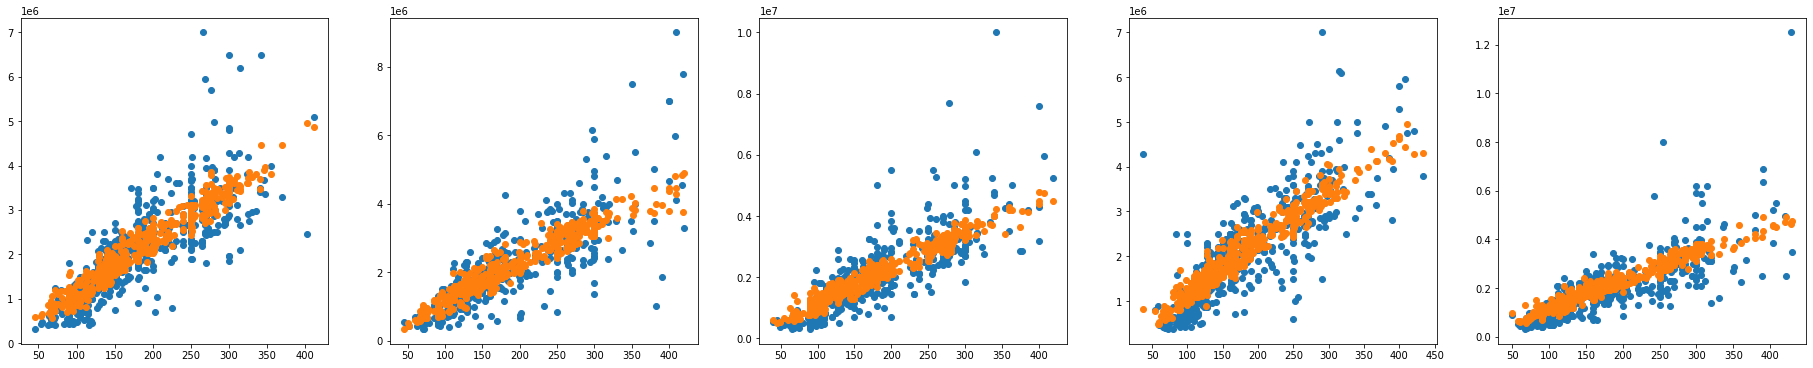

RMSE: 1460700.5059084094 
RMSLE: 0.7510129682373453


In [172]:
fig, axs = plt.subplots(1, 5, figsize=(32,6))
for k_fold in range(5):
    axs[k_fold].scatter(res[k_fold]["x"][feature_x],res[k_fold]["expect"])
    axs[k_fold].scatter(res[k_fold]["x"][feature_x],res[k_fold]["pred"])

plt.show()
    
print("RMSE:", rmse, "\nRMSLE:", rmsle)

In [173]:
# Corrida original
RMSE: 1508058.2066813577 
RMSLE: 0.7469508564291669
R2Score: 0.6195549269556098

# Agregando feature engineering
RMSE: 1499087.4635490575 
RMSLE: 0.7422302301097581
    
# Sumado habitaciones y banos
RMSE: 1437127.522229356 
RMSLE: 0.7312483236703675
R2Score: 0.6520729257874454

In [174]:
df_plot.shape

(3514, 27)

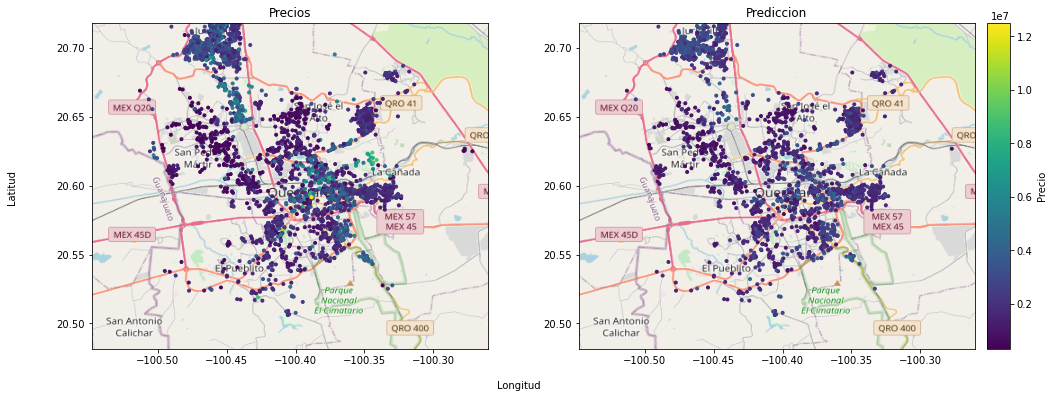

In [175]:
lng = df_plot['lng'].values
lat = df_plot['lat'].values
c = df_plot['precio'].values

# https://www.openstreetmap.org/export#map=12/20.5970/-100.3659
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
img = plt.imread("Queretaro.png")

im = ax1.imshow(img, extent=[-100.5479, -100.2602, 20.4814, 20.7182], vmin = np.min(c), vmax = np.max(c))
ax1.scatter(lng, lat, c = c, marker = '.')

ax2.imshow(img, extent=[-100.5479, -100.2602, 20.4814, 20.7182], vmin = np.min(c), vmax = np.max(c))

lats = []
lngs = []
preds = []
predicts = np.array([])
for k_fold in range(5):
    lngs = res[k_fold]["x"]['lng']
    lats = res[k_fold]["x"]['lat']
    preds = res[k_fold]['pred']
    ax2.scatter(lngs, lats, c=preds, marker = '.', vmin = np.min(c), vmax = np.max(c))
    predicts = np.concatenate((predicts, preds))
    
cax = fig.add_axes([ax2.get_position().x1+0.01,ax2.get_position().y0,0.02,ax2.get_position().height])
    
ax1.title.set_text('Precios')
ax2.title.set_text('Prediccion')
    
fig.text(0.5, 0.04, 'Longitud', ha='center', va='center')
fig.text(0.06, 0.5, 'Latitud', ha='center', va='center', rotation='vertical')

cbar = fig.colorbar(im, cax=cax)
cbar.ax.set_ylabel('Precio')
plt.show()

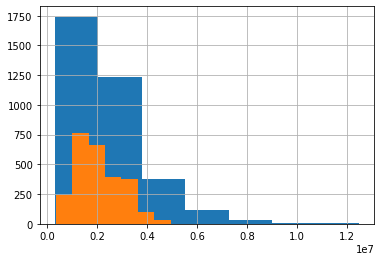

(3514,)


2571

In [176]:
df_plot.precio.hist(bins=7)

plt.hist(predicts, bins=7)
plt.show()

print(df_plot.precio.shape)
len(predicts)

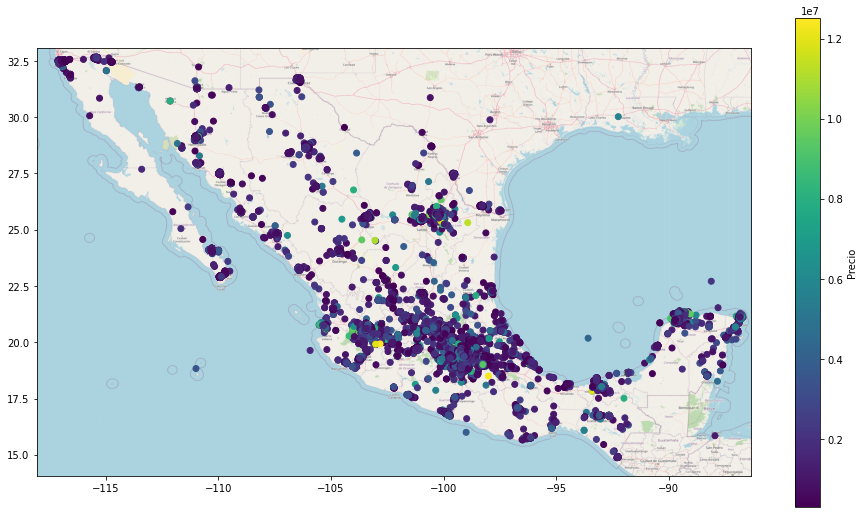

In [177]:
df_prueba = df
df_prueba = df_prueba[(df_prueba["lng"] < -86.353) & (df_prueba["lng"] > -118.081) & (df_prueba["lat"] < 33.064) & (df_prueba["lat"] > 14.051)]
lng = df_prueba['lng'].values
lat = df_prueba['lat'].values
c = df_prueba['precio'].values

# https://www.openstreetmap.org/export#map=5/25.384/-98.481
img = plt.imread("Mexico.png")
plt.figure(figsize=(16, 9))
plt.imshow(img, extent=[-118.081, -86.353, 14.051, 33.064])
plt.scatter(lng, lat, c = c, )

cbar = plt.colorbar()
cbar.ax.set_ylabel("Precio")

# plt.savefig("mapprecios")
plt.show()